In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras
from chromalab.maxbasis import MaxBasis
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import *

objc[4604]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2a0c8ae28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2beec2ea0). One of the two will be used. Which one is undefined.
objc[4604]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2a0c8adb0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2beec2ec8). One of the two will be used. Which one is undefined.
objc[4604]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2a0c8ae50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-pac

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths5 = np.arange(400, 701, 5)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
wavelengths = np.arange(400, 710, 10)
d65 = Illuminant.get("D65")

In [26]:
def plotMaxBasis(maxbasis, wavelengths, dim):
    refs, discrete_points, rgbs, lines = maxbasis.getDiscreteRepresentation()

    size = (2, 2) if dim == 2 else (3, 3) if dim == 3 else (4, 4)
    fig, axs = plt.subplots(size[0], size[1], figsize=(8, 8))
    for i in range(size[0]):
        for j in range(size[1]):
            if i*size[0]+j >= len(refs):
                break
            axs[i, j].plot(wavelengths, refs[i*size[0]+j].data, c=rgbs[i*size[0] + j])
            axs[i, j].fill_between(wavelengths, refs[i*size[0]+j].data, color=rgbs[i*size[0] + j])
            axs[i, j].set_xlabel('Wavelength')
            axs[i, j].set_ylabel('Reflectance')
            # axs[i, j].set_title(f'Ref {i*4+j}')
    plt.tight_layout()
    plt.show()
    return refs, rgbs


100%|██████████| 308/308 [00:00<00:00, 21326.73it/s]


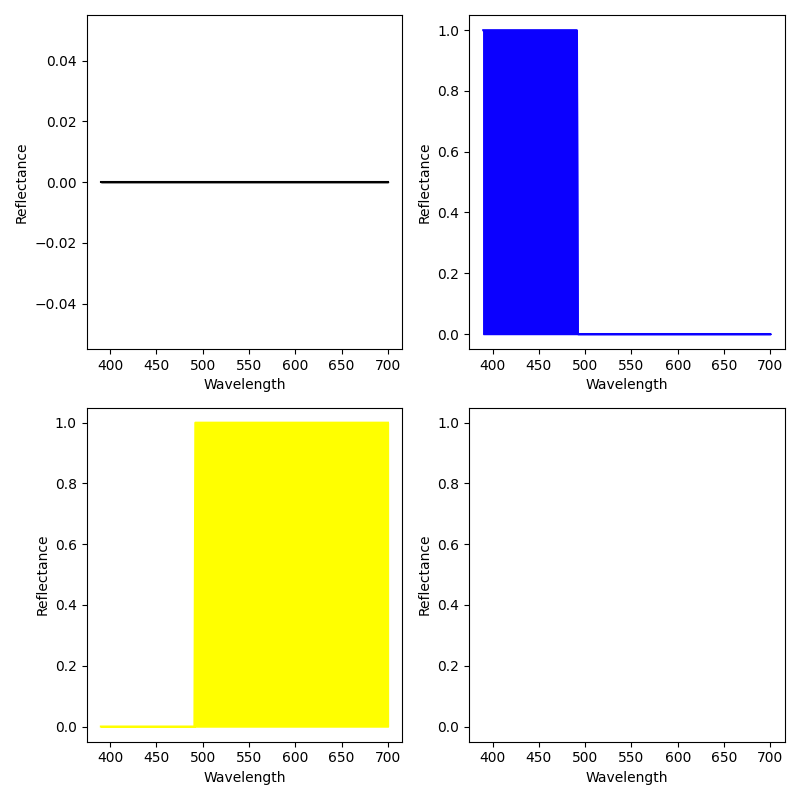

In [31]:
dichromat = Observer.dichromat(wavelengths=wavelengths1, illuminant=d65)
maxbasis_di = MaxBasis(dichromat, verbose=True)
refs, rgbs = plotMaxBasis(maxbasis_di, wavelengths1, 2)

np.save('./data/varun/refs_di.npy', np.array([ref.data for ref in refs]))

100%|██████████| 58/58 [00:00<00:00, 656.07it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


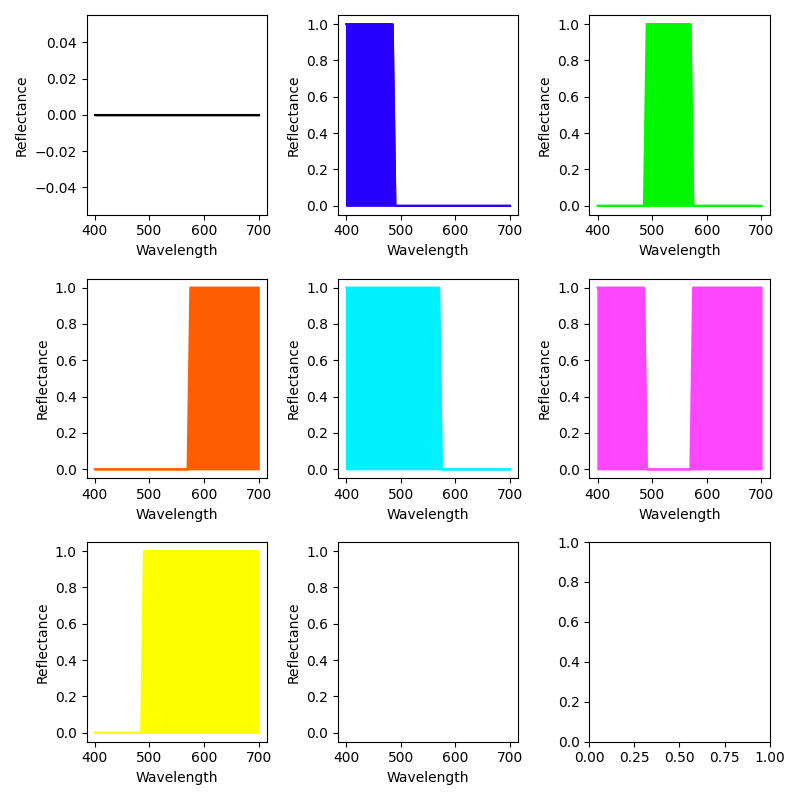

In [27]:
trichromat = Observer.trichromat(wavelengths=wavelengths5, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
# viz_tri = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)
refs, rgbs = plotMaxBasis(maxbasis_tri, wavelengths5, 3)
np.save('./data/varun/refs_tri.npy', np.array([ref.data for ref in refs]))

100%|██████████| 28/28 [00:00<00:00, 66.23it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


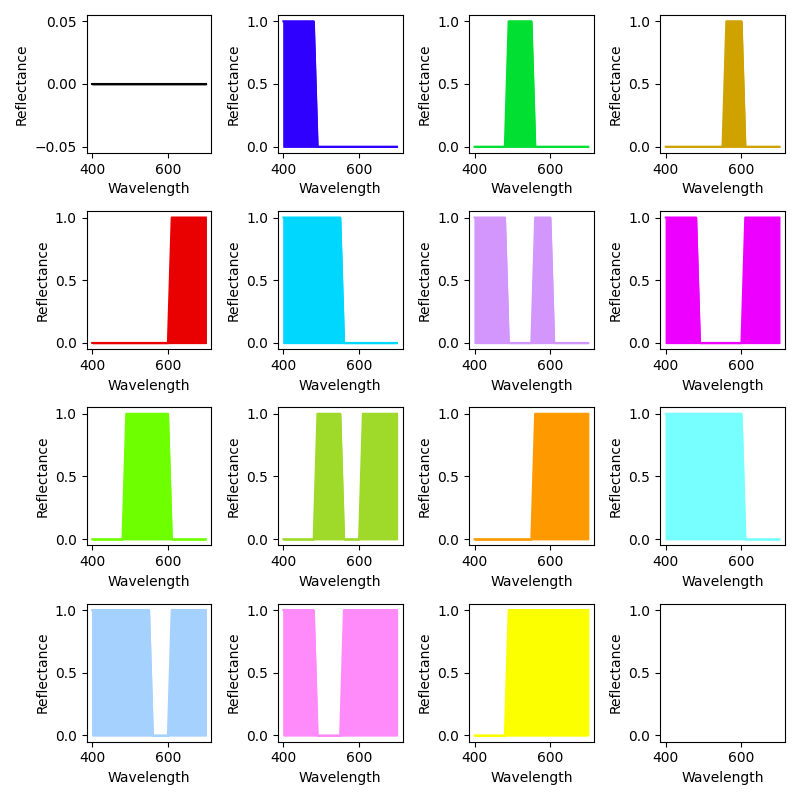

In [38]:
# change wavelengths to wavelenghts5 for better sampling
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths10, illuminant=d65, verbose=True) 
maxbasis_tetra = MaxBasis(tetrachromat, verbose=True)
refs, rgbs = plotMaxBasis(maxbasis_tetra, wavelengths10, 4)
np.save('./data/varun/refs_tetra.npy', np.array([ref.data for ref in refs]))

In [39]:
#wavelengths10 is faster here
viz = PSWrapper(tetrachromat, maxbasis_tetra, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)
viz.renderObjectsPS(mesh_alpha=0.8, lattice_alpha=1)
viz.ps.show()
# @varun you can use polyscope in order to screenshot a view that you like!  

100%|██████████| 8990/8990 [00:19<00:00, 462.08it/s]
